<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.1 Linear Regression

Prediction of House Price Using Linear Regression

# Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
from matplotlib import pyplot as plt

## Explore Data

Perform EDA on this dataset. Use what you have learned so far. Be creative. List all your findings.

In [2]:
# Read CSV
house_csv =  pd.read_csv("Sacramento_transactions.csv")

In [3]:
house_csv.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [4]:
house_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    int64  
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.5+ KB


In [5]:
house_csv.isnull().sum()

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

In [6]:
house_csv.sample(5)

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
409,332 PALIN AVE,GALT,95632,CA,3,2,1204,Residential,Mon May 19 00:00:00 EDT 2008,174000,38.260467,-121.302636
421,6128 CARL SANDBURG CIR,SACRAMENTO,95842,CA,3,1,1009,Residential,Mon May 19 00:00:00 EDT 2008,198000,38.681541,-121.355616
546,2049 EMPIRE MINE CIR,GOLD RIVER,95670,CA,4,2,3037,Residential,Mon May 19 00:00:00 EDT 2008,528000,38.629299,-121.249021
139,7837 ABBINGTON WAY,ANTELOPE,95843,CA,4,2,1830,Residential,Wed May 21 00:00:00 EDT 2008,387731,38.709873,-121.339472
5,5828 PEPPERMILL CT,SACRAMENTO,95841,CA,3,1,1122,Condo,Wed May 21 00:00:00 EDT 2008,89921,38.662595,-121.327813


# Predict Price

We are going to predict `price` from available information.

## What is the Target Variable? Why?

In [7]:
# ANSWER
# Target variable is the price as we are trying to predict prices based on other variables.

price= house_csv['price']

## List all possible variables which might be Predictor variable.

In [8]:
# ANSWER
#Type, bed, bath,sq_ft

In [9]:
# type

h_type = house_csv['type']
h_type.value_counts()


Residential     917
Condo            54
Multi-Family     13
Unkown            1
Name: type, dtype: int64

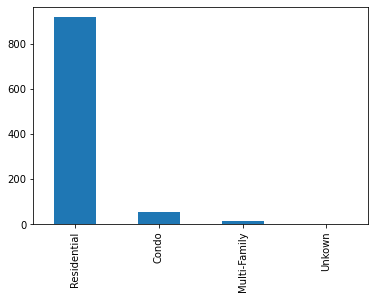

In [10]:
h_type.value_counts().plot.bar()

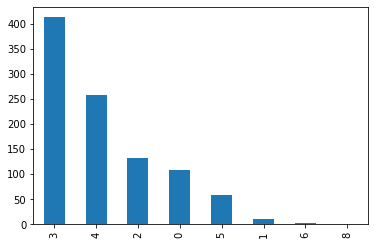

In [11]:
#Bed
beds = house_csv['beds']
beds.value_counts().plot.bar()

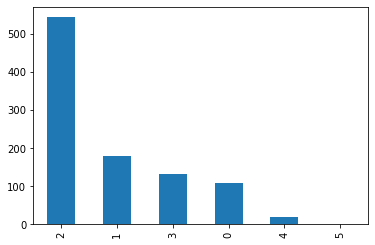

In [12]:
#Baths
baths = house_csv['baths']
baths.value_counts().plot.bar()

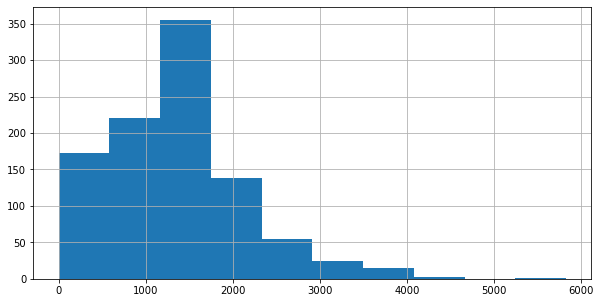

In [13]:
#sq__ft
size = house_csv['sq__ft']
size.hist(figsize=(10,5))

## Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

In [14]:
# ANSWER
house_csv.corr()



,zip,beds,baths,sq__ft,price,latitude,longitude
zip,1.000000,0.125319,0.069165,0.130108,-0.093353,-0.290389,-0.539904
beds,0.125319,1.000000,0.839650,0.684041,0.342024,-0.291307,-0.053993
baths,0.069165,0.839650,1.000000,0.665690,0.416208,-0.235792,0.016582
sq__ft,0.130108,0.684041,0.665690,1.000000,0.333897,-0.383274,-0.177742
price,-0.093353,0.342024,0.416208,0.333897,1.000000,-0.039573,0.284485
latitude,-0.290389,-0.291307,-0.235792,-0.383274,-0.039573,1.000000,0.387925
longitude,-0.539904,-0.053993,0.016582,-0.177742,0.284485,0.387925,1.000000


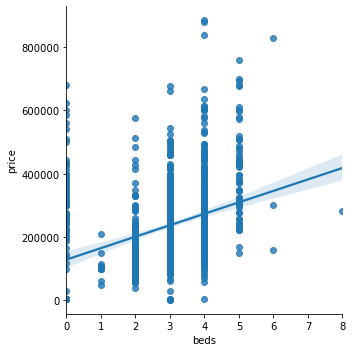

In [15]:
# ANSWER
#Bed & Price
sns.lmplot(x='beds',y='price', data=house_csv)

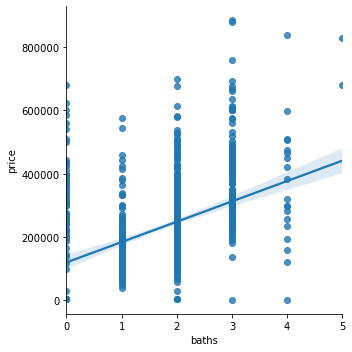

In [16]:
# ANSWER
#Bath & Price
sns.lmplot(x='baths',y='price', data=house_csv)

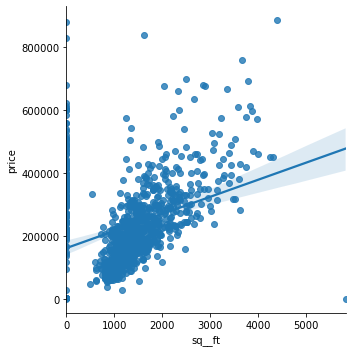

In [17]:
#Size & Price
sns.lmplot(x='sq__ft',y='price', data=house_csv)

## What is the simplest way to predict price

So we have information for 985 houses. What is the easiest way to predict price of a house?

In [18]:
# ANSWER

house_csv['y_hat']=house_csv['price'].mean()

In [19]:
X = house_csv['sq__ft']
Y = house_csv['price']
yhat = house_csv['y_hat']

In [20]:
def draw_plot(X,Y,yhat):
    #plot the data
    #create a fig
    
    fig = plt.figure(figsize=(15,7))
    
    #get the axis of that figure
    ax=plt.gca()
    
    #plot scatter plot with our data
    ax.scatter(X,Y,c='b')
    ax.plot(X,yhat,color='r');
    
    plt.show()

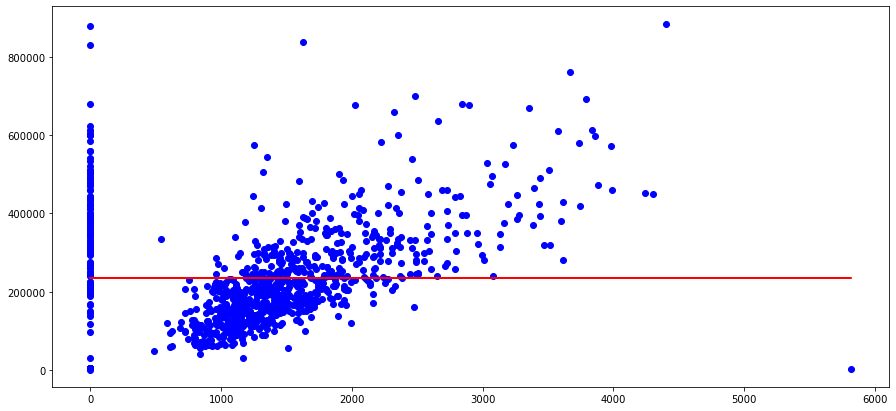

In [21]:
draw_plot(X,Y,yhat)

## Find Resudals

Find difference between actual value and predicted value. Use absolute value.

In [22]:
# ANSWER
res = abs(house_csv['price']-house_csv['y_hat']).mean()
res

103452.16956891476

## Predict Using Linear Regression

[Simple Linear Regression](https://en.wikipedia.org/wiki/Simple_linear_regression#Fitting_the_regression_line)

$$\hat{y} = \beta_0 + \beta_1 x$$

> $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

and

> $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

Given variables:
- $\bar{y}$ : the sample mean of observed values $Y$
- $\bar{x}$ : the sample mean of observed values $X$

### Define X, Y

- X = Predictor Variable 
- Y = Target Variable

In [23]:
# ANSWER

#y-hat -> predicted value›

### Calculate beta_1

$$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

In [24]:
# ANSWER

def calculate_beta_1(X,Y):
    Xbar = X.mean()
    Ybar = Y.mean()
    
    n = np.sum((Y-Ybar)*(X - Xbar))
    d = np.sum(np.square(X - Xbar))
    
    beta_1 = n/d
    
    return beta_1

In [25]:
beta_1 = calculate_beta_1(X,Y)
beta_1

54.158639688530755

### Calculate beta_0

$$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

In [26]:
# ANSWER
def calculate_beta_0(X,Y):
    Xbar = X.mean()
    Ybar = Y.mean()
    
    beta_0 = Ybar - calculate_beta_1(X,Y)* Xbar
    
    return beta_0

In [27]:
beta_0 = calculate_beta_0 (X,Y)
beta_0

162930.16140699777

### Find Yhat (Predicted Value Using Beta 0 and Beta 1)

$$\hat{y} = \beta_0 + \beta_1 x$$

In [28]:
# ANSWER
def calculate_yhat(x, b0, b1):
    return b0+b1*x

In [29]:
yhat = calculate_yhat(X,beta_0, beta_1)
yhat

0      208206.784187
1      226133.293924
2      206040.438599
3      209073.322422
4      206094.597239
           ...      
980    286411.859897
981    242922.472227
982    228787.067268
983    254187.469282
984    236694.228663
Name: sq__ft, Length: 985, dtype: float64

### Find Residuals

$$ \text{residual}_i = y_i - \hat{y}_i$$

In [30]:
# ANSWER

def calculate_residual(Y,yhat):
    res = Y - yhat
    return res

### Find R-Square

The coefficient $R^2$ is defined as $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$, where $$ SS_{res} $$ is the residual sum of squares $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$ and $$ SS_{res} $$ is the total sum of squares $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

**Write a function to calculate R- Square value.**

The total sum of squares:

$$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The residual sum of squares:

$$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$

$R^2$:

$$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$

In [31]:
# ANSWER

def calculate_total_sum_of_square(Y):
    Ybar = np.mean(Y)
    SStot = np.square(Y - Ybar)
    SStot = np.sum(SStot)
    return SStot

In [32]:
def calculate_residual_sum_of_square(Y,yhat):
    SSres = np.square (Y - yhat)
    SSres = np.sum(SSres)
    return SSres

In [33]:
def calculate_r_square(Y,yhat):
    SStot = calculate_total_sum_of_square(Y)
    SSres = calculate_residual_sum_of_square(Y,yhat)
    Rsquare = 1 - (SSres/SStot)
    return Rsquare

In [34]:
calculate_r_square(Y,np.mean(Y))

0.0

In [35]:
calculate_r_square(Y,calculate_yhat(X, beta_0, beta_1))

0.11148717682951459

### [BONUS] Draw Plot of Predicted Line

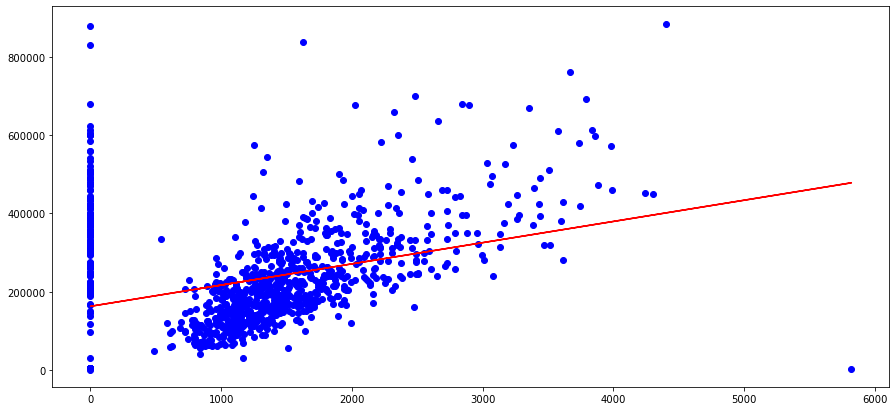

In [36]:
# ANSWER
draw_plot(X,Y,yhat)

### [BONUS] Draw Plot of Predicted Line With Resudals

In [37]:
# ANSWER

### Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house.**

In [38]:
# ANSWER
beta_0

162930.16140699777

In [39]:
beta_1

54.158639688530755

In [40]:
xpred = 1204
Ypred = beta_1 * xpred + beta_0
Ypred

228137.1635919888

© 2020 Institute of Data